In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [2]:
data = pd.read_csv('SAM.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/22/2015,222.850006,223.100006,220.919998,221.660004,221.660004,147800
1,7/23/2015,221.389999,225.000000,221.220001,222.960007,222.960007,225900
2,7/24/2015,224.070007,226.250000,223.190002,224.149994,224.149994,169000
3,7/27/2015,221.199997,222.639999,217.869995,218.210007,218.210007,221300
4,7/28/2015,218.630005,219.059998,214.210007,218.199997,218.199997,196800


In [3]:
data1 = data.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
data1.head()

,Date,Close
0,7/22/2015,221.660004
1,7/23/2015,222.960007
2,7/24/2015,224.149994
3,7/27/2015,218.210007
4,7/28/2015,218.199997


Text(0.5, 1.0, 'SAM (Boston Beer Company) Stock History')

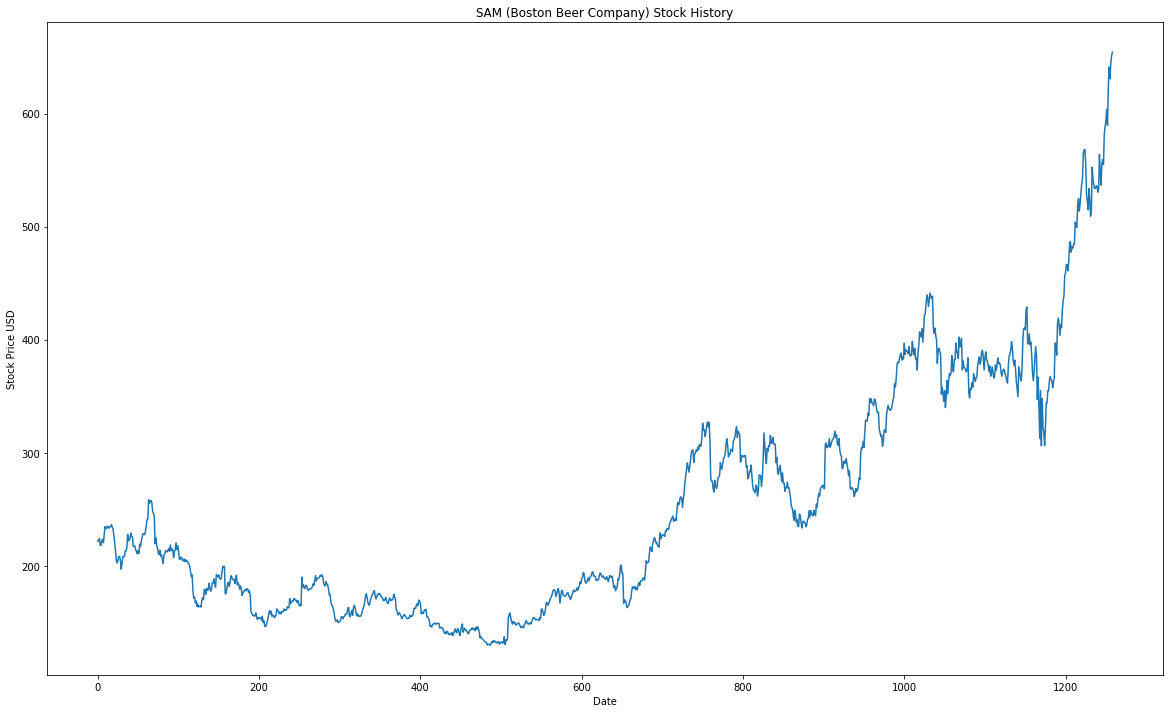

In [4]:
data1["Date"]=pd.to_datetime(data1.Date,format="%m/%d/%Y")
plt.figure(figsize=(20,12))
plt.plot(data1["Close"])
plt.ylabel('Stock Price USD')
plt.xlabel('Date')
plt.title('SAM (Boston Beer Company) Stock History')

In [5]:
model_df = data1.iloc[0:619,:]
model_df.head()

,Date,Close
0,2015-07-22,221.660004
1,2015-07-23,222.960007
2,2015-07-24,224.149994
3,2015-07-27,218.210007
4,2015-07-28,218.199997


In [6]:
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_df)):
    input_data.append(model_df.loc[i-60:i,"Close"])
    output_data.append(model_df.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [7]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [8]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [9]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_scaled,y_train_scaled,epochs=10,batch_size=65,verbose=2)

Train on 419 samples
Epoch 1/10
419/419 - 4s - loss: 0.1037
Epoch 2/10
419/419 - 0s - loss: 0.0155
Epoch 3/10
419/419 - 0s - loss: 0.0100
Epoch 4/10
419/419 - 0s - loss: 0.0095
Epoch 5/10
419/419 - 0s - loss: 0.0058
Epoch 6/10
419/419 - 0s - loss: 0.0051
Epoch 7/10
419/419 - 0s - loss: 0.0043
Epoch 8/10
419/419 - 0s - loss: 0.0039
Epoch 9/10
419/419 - 0s - loss: 0.0036
Epoch 10/10
419/419 - 0s - loss: 0.0035


In [10]:
# Reshape testing data to fit new model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [11]:
# Evaluate the model
model_loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

140/1 - 1s - loss: 0.0025
Loss: 0.0029288451919066054


In [12]:
# Predict y values for test data, then see how closely they match actuals
predicted_closing_price=model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[222.73552],
       [153.02069],
       [142.63124],
       [209.06216],
       [145.19742],
       [173.73268],
       [164.66893],
       [158.2405 ],
       [142.2025 ],
       [147.61523],
       [166.26833],
       [155.52414],
       [214.16217],
       [172.90935],
       [177.97745],
       [158.83176],
       [143.00233],
       [154.87967],
       [184.80072],
       [158.93338],
       [145.4509 ],
       [149.19691],
       [158.22084],
       [173.2448 ],
       [145.9992 ],
       [143.40872],
       [183.22603],
       [142.2243 ],
       [204.53438],
       [149.74463],
       [144.64336],
       [177.5136 ],
       [170.92264],
       [143.11003],
       [162.45137],
       [154.67705],
       [177.697  ],
       [138.52979],
       [139.35422],
       [161.25995],
       [208.9366 ],
       [174.71625],
       [162.2628 ],
       [209.93993],
       [177.94763],
       [174.65378],
       [159.39246],
       [161.09145],
       [135.14929],
       [154.54158],


In [13]:
predicted_stock_price = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [14]:
new_data = pd.DataFrame({"Predicted": predicted_stock_price})
new_data

,Predicted
0,222.735519
1,153.020691
2,142.631241
3,209.062164
4,145.197418
...,...
135,185.808212
136,172.080673
137,186.562347
138,183.029541


In [15]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[209.660004],
       [146.419998],
       [134.649994],
       [204.339996],
       [144.25    ],
       [173.      ],
       [171.130005],
       [165.199997],
       [139.050003],
       [149.449997],
       [151.320007],
       [156.440002],
       [209.570007],
       [176.5     ],
       [164.5     ],
       [154.210007],
       [142.75    ],
       [150.039993],
       [185.      ],
       [160.479996],
       [142.300003],
       [145.449997],
       [146.600006],
       [177.149994],
       [139.899994],
       [150.949997],
       [164.      ],
       [140.800003],
       [202.649994],
       [149.199997],
       [143.149994],
       [179.449997],
       [156.479996],
       [139.600006],
       [160.800003],
       [156.100006],
       [176.619995],
       [129.949997],
       [132.399994],
       [168.75    ],
       [212.919998],
       [157.669998],
       [171.75    ],
       [205.240005],
       [179.449997],
       [163.949997],
       [155.25    ],
       [171.0

In [16]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
new_data["Actual"] = actuals
new_data

,Predicted,Actual
0,222.735519,209.660004
1,153.020691,146.419998
2,142.631241,134.649994
3,209.062164,204.339996
4,145.197418,144.250000
...,...,...
135,185.808212,183.080002
136,172.080673,170.250000
137,186.562347,192.050003
138,183.029541,173.789993


In [17]:
inputs = []

for i in range(619,len(data1)):
    inputs.append(data1.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[188.99915],
       [188.80803],
       [188.55898],
       [188.41661],
       [188.44627],
       [188.57945],
       [188.7078 ],
       [188.80917],
       [188.91222],
       [188.93063],
       [188.87993],
       [188.74843],
       [188.6454 ],
       [188.50133],
       [188.24405],
       [188.0335 ],
       [187.94087],
       [187.90901],
       [187.90956],
       [187.96956],
       [187.87172],
       [187.48096],
       [186.9256 ],
       [186.11069],
       [185.18785],
       [184.28436],
       [183.6974 ],
       [183.37357],
       [183.4117 ],
       [184.02493],
       [185.09784],
       [186.2131 ],
       [187.28142],
       [187.30916],
       [186.57698],
       [185.26094],
       [183.51561],
       [181.36429],
       [179.04106],
       [176.71378],
       [174.57906],
       [172.79515],
       [171.40291],
       [170.59999],
       [170.42323],
       [170.7119 ],
       [171.29979],
       [172.13466],
       [173.01418],
       [173.9167 ],


In [20]:
forecast = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecasted_stock = data1.iloc[619:,:]
forecasted_stock

,Date,Close
619,2018-01-04,187.899994
620,2018-01-05,187.350006
621,2018-01-08,188.000000
622,2018-01-09,191.800003
623,2018-01-10,193.750000
...,...,...
1254,2020-07-15,641.000000
1255,2020-07-16,630.780029
1256,2020-07-17,643.580017
1257,2020-07-20,650.789978


In [22]:
forecasted_stock["Prediction"] = forecast
forecasted_stock

C:\Users\Joymode\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
619,2018-01-04,187.899994,188.999146
620,2018-01-05,187.350006,188.808029
621,2018-01-08,188.000000,188.558975
622,2018-01-09,191.800003,188.416611
623,2018-01-10,193.750000,188.446274
...,...,...,...
1254,2020-07-15,641.000000,449.640381
1255,2020-07-16,630.780029,451.314606
1256,2020-07-17,643.580017,452.959686
1257,2020-07-20,650.789978,454.600647


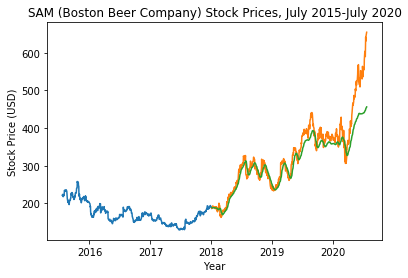

In [23]:
model_df = model_df.set_index("Date")
forecasted_stock = forecasted_stock.set_index("Date")
plt.plot(model_df["Close"])
plt.plot(forecasted_stock[['Close',"Prediction"]])
plt.title("SAM (Boston Beer Company) Stock Prices, July 2015-July 2020")
plt.xlabel('Year')
plt.ylabel('Stock Price (USD)')
plt.savefig('SAM_Prediction.png')